In [1]:
import pandas as pd

In [4]:
df = pd.read_excel("/content/eletroinox.com.br-Performance-on-Search-2025-12-12 (1).xlsx", sheet_name='Páginas')

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

display(df.head())

,Páginas principais,Cliques,Impressões,CTR,Posição
0,https://www.eletroinox.com.br/,221,2828,0.0781,13.78
1,https://www.eletroinox.com.br/eletropolimento,191,4885,0.0391,4.17
2,https://www.eletroinox.com.br/polimento-mecanico,163,7234,0.0225,8.01
3,https://www.eletroinox.com.br/solda-orbital,114,5130,0.0222,5.81
4,http://www.eletroinox.com.br/,108,2135,0.0506,8.39


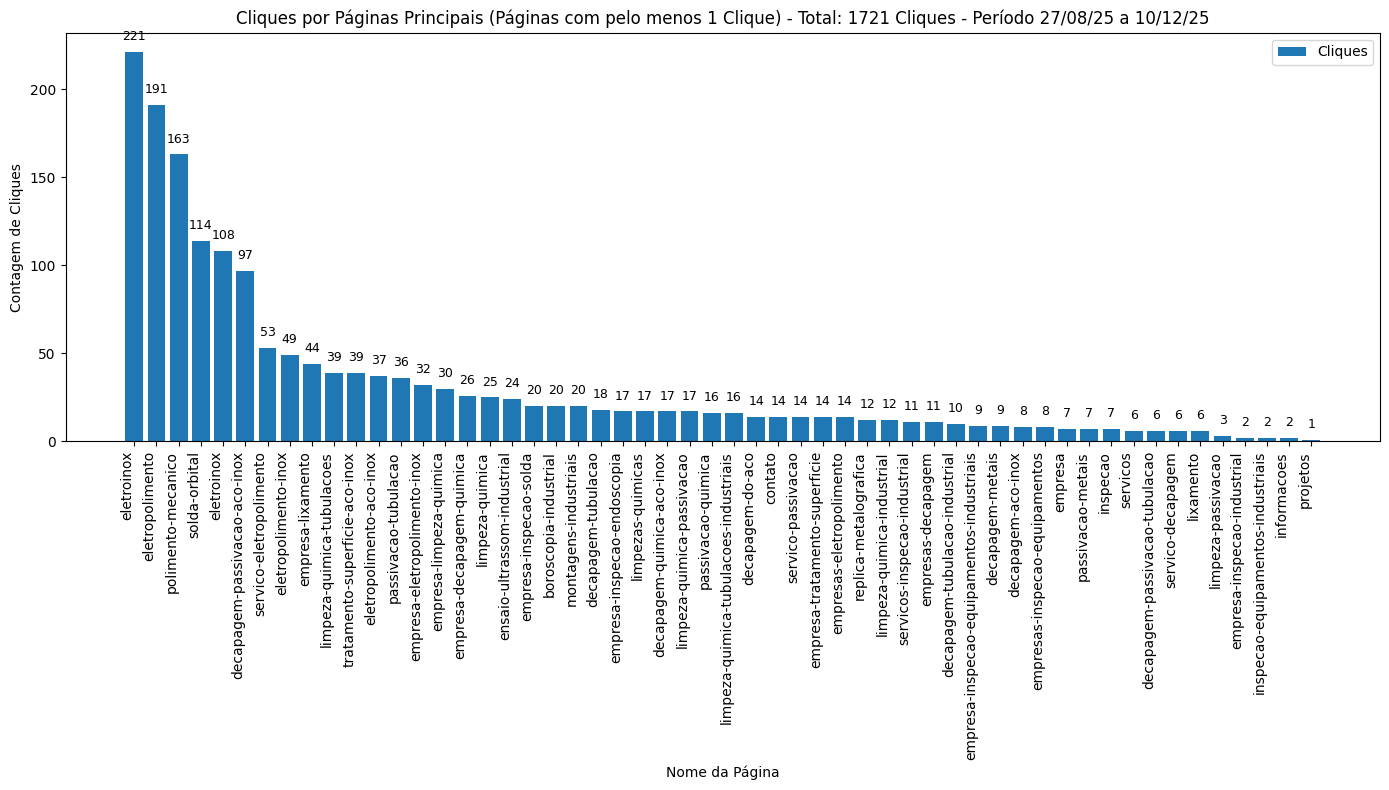

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse

# tenha pelomenos um clique
filtered_df = df[df['Cliques'] >= 1].copy()

# Essa função extrai o nome da pagina do url exemplo:(https://www.eletroinox.com.br/decapagem) fica só decapagem no gráfico
def get_page_slug(url):
    parsed_url = urlparse(url)
    path = parsed_url.path.strip('/')
    if path:
        return path.split('/')[-1]
    # se o caminho estiver vazio usa o dominio
    return parsed_url.netloc.replace('www.', '').split('.')[0]

# aplica a função para criar uma nova coluna
filtered_df['Nome da Página'] = filtered_df['Páginas principais'].apply(get_page_slug)

# ordenamos pelo numero de cliques para visualizar melhor
filtered_df = filtered_df.sort_values(by='Cliques', ascending=False)

plt.figure(figsize=(14, 8)) # aumenta o tamanho da figura

# Criar as posições para as barras (apenas para Cliques)
x = range(len(filtered_df['Nome da Página']))

# Plotar Cliques
bars = plt.bar(x, filtered_df['Cliques'], label='Cliques')

# Adicionar o número exato de cliques em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=9)

# Calcular o total de cliques
total_cliques = filtered_df['Cliques'].sum()

plt.xlabel('Nome da Página')
plt.ylabel('Contagem de Cliques')
plt.title(f'Cliques por Páginas Principais (Páginas com pelo menos 1 Clique) - Total: {total_cliques} Cliques - Período 27/08/25 a 10/12/25')
plt.xticks(x, filtered_df['Nome da Página'], rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Nova seção